In [3]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.patches as patches
from matplotlib import cm
import cv2 as cv
from PIL import Image
from scipy.integrate import simpson
import mpl_toolkits.mplot3d.art3d as art3d
from skimage import measure

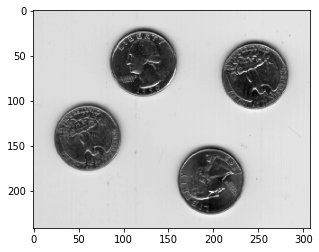

In [4]:
img = cv.imread('/home/n7student/Bureau/projet segmentation/test.png')
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')
plt.show()

In [5]:
def div(px, py):
    dim = px.shape
    M = np.zeros(dim)
    Mx, My = M, M
    Mx[1:-1,:] = px[1:-1,:] - px[:-2,:]
    Mx[0,:] = px[0,:]
    Mx[-1,:] = -px[-1,:]
    My[:,1:-1] = py[:,1:-1] - py[:,:-2]
    My[:,0] = py[:,0]
    My[:,-1] = -py[:,-1]
    return Mx + My

In [6]:
def gradx(X):
    dim = X.shape
    M = np.zeros((dim[0], dim[1]))
    M[:-1,:] = X[1:,:] - X[:-1,:]
    return M

In [7]:
def grady(Y):
    dim = Y.shape
    M = np.zeros((dim[0], dim[1]))
    M[:,:-1] = Y[:,1:] - Y[:,:-1]
    return M

In [95]:
def int_2D(zz):
    
    dim = zz.shape
    Y = np.arange(dim[0])
    X = np.arange(dim[1])
    return simpson([simpson(zz_x,X) for zz_x in zz],Y)

In [96]:
def projection(u) : 
    return np.minimum(np.maximum(u, 0), 1)

In [239]:
def compute_energy_smooth(mask,foreground,background,lamb,eps=0.000001):
    gradient_u_x, gradient_u_y = gradx(mask), grady(mask)
    norm_gradient_u_eps = np.sqrt((gradient_u_x**2 + gradient_u_y**2 + eps**2))
    
   
    return int_2D(norm_gradient_u_eps*np.ones(mask.shape)) + lamb * int_2D(np.abs(foreground) * mask)+lamb * int_2D(np.abs(background) * (1 - mask))
    

In [240]:
def projected_gradient(mask, grey_img, tau, lamb, c1, c2, nb_iter, threshold, eps=0.000001) : 
    mask_copy = np.copy(mask)
    foreground = (grey_img-c1)**2
    background = (grey_img-c2)**2
    functional = []
    for i in range(nb_iter) : 
        gradient_u_x, gradient_u_y = gradx(mask_copy), grady(mask_copy)
        norm_gradient = np.sqrt(np.sum(gradient_u_x**2 + gradient_u_y**2 + eps**2))
        px, py = gradient_u_x/norm_gradient, gradient_u_y/norm_gradient
        d = div(px,py)
        res = mask_copy + tau*(d-lamb*foreground + lamb*background)
        
        mask_copy = projection(res)
        
        energy = compute_energy_smooth(mask_copy,foreground,background,lamb,eps=0.000000001)
        
        functional.append(energy)
    
    binary_mask = np.where(mask_copy >= threshold, 1, 0)
    print(lamb)
    plt.imshow(binary_mask, cmap='hot', interpolation='nearest')
    plt.show()
    return binary_mask, functional

In [244]:
tau = 0.01
c1 = 110.
c2 = 227.
lamb = 10e-5
nb_iter = 100
threshold = 0.5

In [245]:
#lambda entre e-5 et 10e-5

0.0001


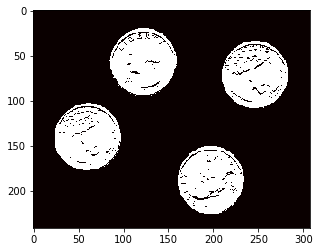

In [246]:
dim = gray.shape
mask0 = np.zeros(dim)
mask, functional = projected_gradient(mask0, gray, tau, lamb, c1, c2, nb_iter, threshold)

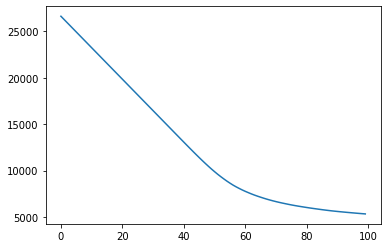

In [247]:
plt.plot(functional
        )